[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW6.ipynb)

**Problem 1** One of the earliest uses of regression was by Francis Galton who studied genetics. He used regression to predict children's heights based on the heights of their parents. There is an interesting story about it here: https://www.newyorker.com/magazine/2005/01/24/measure-for-measure-5. The following chunk loads in Galton's real data set that he used to determine the relationship between children's and parents heights.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [1]:
# Run next line if in colab. Or run if need to install library
%pip install pydataset

import pandas as pd
from pydataset import data
heights = pd.DataFrame(data("GaltonFamilies"))
heights

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 38.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939415 sha256=e5d2ed53c20bc72bb6efceb00de6adfea7f3db717e08ac1d2a920018d8e090d4
  Stored in directory: /root/.cache/pip/wheels/4c/82/ad/f04abc617222b10438b1285ab9b5cfaecd180c10a7c81cff54
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


,family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,001,78.5,67.0,75.43,4,1,male,73.2
2,001,78.5,67.0,75.43,4,2,female,69.2
3,001,78.5,67.0,75.43,4,3,female,69.0
4,001,78.5,67.0,75.43,4,4,female,69.0
5,002,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
930,203,62.0,66.0,66.64,3,1,male,64.0
931,203,62.0,66.0,66.64,3,2,female,62.0
932,203,62.0,66.0,66.64,3,3,female,61.0
933,204,62.5,63.0,65.27,2,1,male,66.5


Part a. Explore the relationship between the target variable, childHeight, and the parents heights. Do not split by gender.

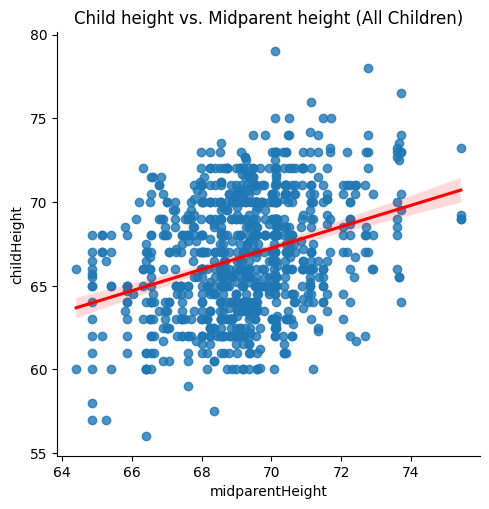

                            OLS Regression Results                            
Dep. Variable:            childHeight   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     107.0
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           8.05e-24
Time:                        19:59:13   Log-Likelihood:                -2465.0
No. Observations:                 934   AIC:                             4934.
Df Residuals:                     932   BIC:                             4944.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          22.6362      4.265     

In [4]:
heights = pd.DataFrame(data("GaltonFamilies"))

sns.lmplot(
    data=heights,
    x="midparentHeight",
    y="childHeight",
    line_kws={"color": "red"}
)
plt.title("Child height vs. Midparent height (All Children)")
plt.show()

model = smf.ols("childHeight ~ midparentHeight", data=heights).fit()
print(model.summary())

Part b. Explore the relationship again, this time splitting the data set by gender. In other words, repeat part a, but separately for males and females.

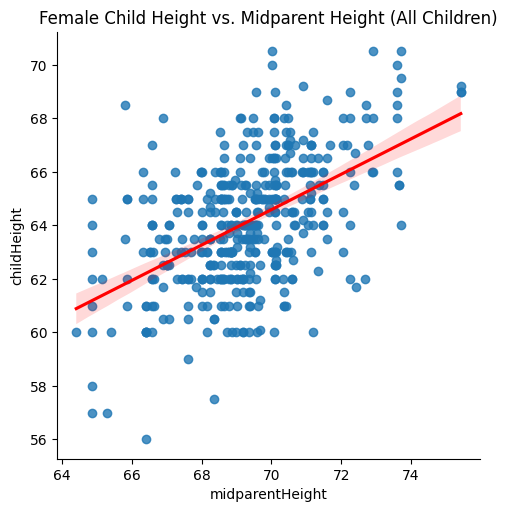

                            OLS Regression Results                            
Dep. Variable:            childHeight   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     161.3
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           8.24e-32
Time:                        20:02:46   Log-Likelihood:                -961.16
No. Observations:                 453   AIC:                             1926.
Df Residuals:                     451   BIC:                             1935.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          18.3335      3.605     

In [8]:
heights_female = heights[heights.gender == "female"]

sns.lmplot(
    data=heights_female,
    x="midparentHeight",
    y="childHeight",
    line_kws={"color": "red"}
)
plt.title("Female Child Height vs. Midparent Height (All Children)")
plt.show()

model = smf.ols("childHeight ~ midparentHeight", data=heights_female).fit()
print(model.summary())

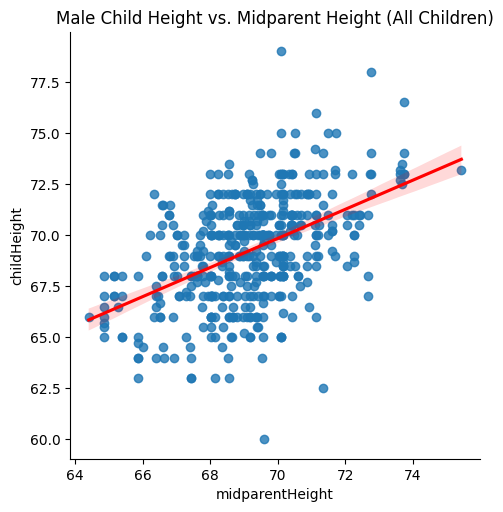

                            OLS Regression Results                            
Dep. Variable:            childHeight   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     145.6
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           1.89e-29
Time:                        20:06:02   Log-Likelihood:                -1082.2
No. Observations:                 481   AIC:                             2168.
Df Residuals:                     479   BIC:                             2177.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          19.9135      4.089     

In [10]:
heights_male = heights[heights.gender == "male"]

sns.lmplot(
    data=heights_male,
    x="midparentHeight",
    y="childHeight",
    line_kws={"color": "red"}
)
plt.title("Male Child Height vs. Midparent Height (All Children)")
plt.show()

model = smf.ols("childHeight ~ midparentHeight", data=heights_male).fit()
print(model.summary())

Part c. Why is separating by gender important for understanding the relationship between child's and parent's heights?

Seperating the gender is important because male and female differe distnictly in height. Males are generally significantly taller than females. When you pool these two distinct patterns into one model it can skew the results which leads to faulty estimates for slope and intercept. As you can see from the regression results from the male and female results the slopes and intercepts are different, with male values being greater.

**Problem 2**: Continuing with Galton's height data, fit a linear regression model using midparentHeight and gender as variables.

Part a. Write the code to fit the model.

In [12]:
import statsmodels.formula.api as smf

model2 = smf.ols("childHeight ~ midparentHeight + gender", data=heights).fit()

print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:            childHeight   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     803.6
Date:                Thu, 30 Oct 2025   Prob (F-statistic):          1.71e-203
Time:                        20:09:09   Log-Likelihood:                -2047.4
No. Observations:                 934   AIC:                             4101.
Df Residuals:                     931   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.5141      2.734     

Part b. To include gender as a variable in the model, you needed to create a dummy variable. What is the base level for the variable you created.

The dummy variable was created behind the scenes by statsmodels.formula.api.ols. The variable that was created is T.male. This variable will be 1 if the child is a male and 0 if a female. Thus, female is the base level for the dummy variable that was created.

Part c. Interpret both coefficients in the model you created in the context of the problem.

Coefficient 1, gender[T.male] (5.2151): Male children's predicted height is on average 5.2151 inches taller than female children.

Coefficient 2, midparentHeight (0.6870): For each 1-inch increase in midparentHeight by child's predicted height will increase by 0.6870 inches, holding gender constant.

**Problem 3** Write code to fit a regression tree for the data.

Part a. Write code to fit the model with a max depth of 3.

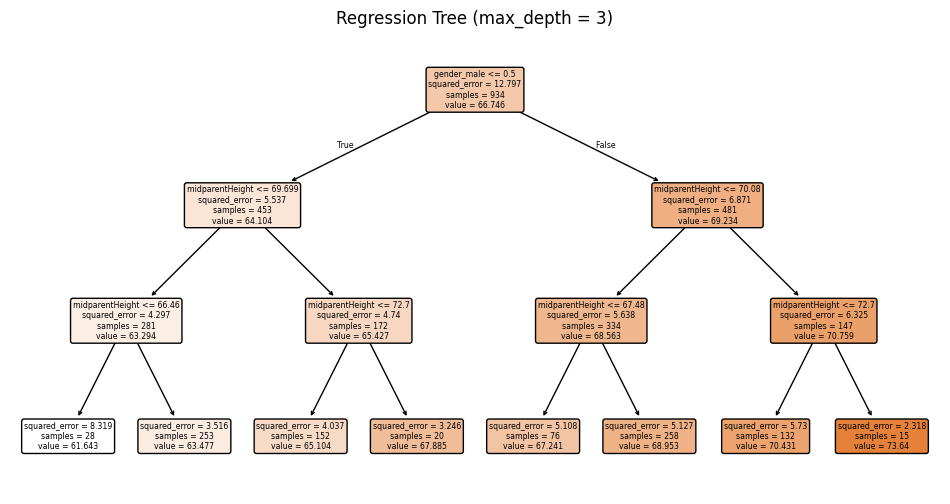

In [16]:
X = heights[['midparentHeight', 'gender']]
X = pd.get_dummies(X, drop_first=True)
y = heights['childHeight']

tree_model = DecisionTreeRegressor(max_depth=3, random_state=1)
tree_model.fit(X, y)

plt.figure(figsize=(12, 6))
plot_tree(tree_model,
          feature_names=X.columns,
          filled=True,
          rounded=True)
plt.title("Regression Tree (max_depth = 3)")
plt.show()

Part b. Find any split based on gender. Describe what those splits mean?

There is one split based on gender and it is at the root. Which makes sense because male and female height's will be significantly different so the model immediately splits them. The splitting variable is "gender_male <= 0.5" which makes sense because we categorized males as 1 and females as 0 so females are categorized on the left and males on the right.

**Problem 4**: Insurance companies will use individual characteristics to predict how much an individual will cost in order to reserve enough money on hand to cover expenses. The data set we will use is from Kaggle. You can find it at: https://www.kaggle.com/datasets/mirichoi0218/insurance

The full data set you get from kaggle you can get into Python using

insurance_all = pd.read_csv("https://richardson.byu.edu/220/insurance_all.csv")

Use this dataset to answer the remainder of the questions on the homework.

In [20]:
insurance_all = pd.read_csv("https://richardson.byu.edu/220/insurance_all.csv")
insurance_all.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
max_age = insurance_all["age"].max()
min_age = insurance_all["age"].min()
print(f"max age: {max_age}")
print(f"min age: {min_age}")

max_children = insurance_all["children"].max()
min_children = insurance_all["children"].min()
print(f"max children: {max_children}")
print(f"min children: {min_children}")

max age: 64
min age: 18
max children: 5
min children: 0


In [23]:
regions = insurance_all["region"].unique()
print(regions)

['southwest' 'southeast' 'northwest' 'northeast']


Part a. For each variable in the data set, list if it is continuous or categorical. If categorical specify if it is binary or not and list each value it can have.

Age: Continuous; 18 <= age <= 64

Sex: Categorical; binary, ['female', 'male']

bmi: Continuous

Children: Continuous; non binary, 0 <= children <= 5

Smoker: Categorical; binary, ['yes', 'no']

region: Categorical; non binary, ['southwest' 'southeast' 'northwest' 'northeast']

charges (target variable): Continuous

Part b. Do an exploratory analysis of the data. charges is the target variable and the rest are predictors. Use figures to explore the relationship between the predictor variables in the data and charges.

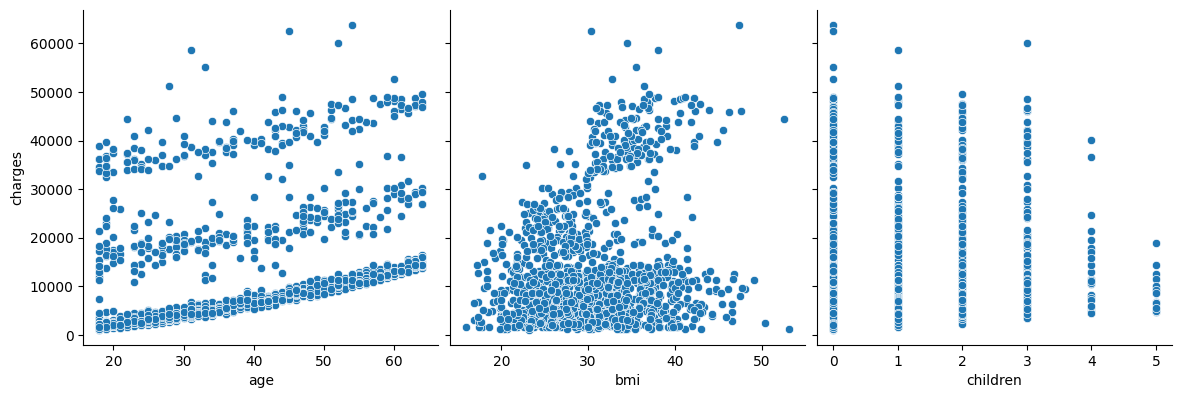

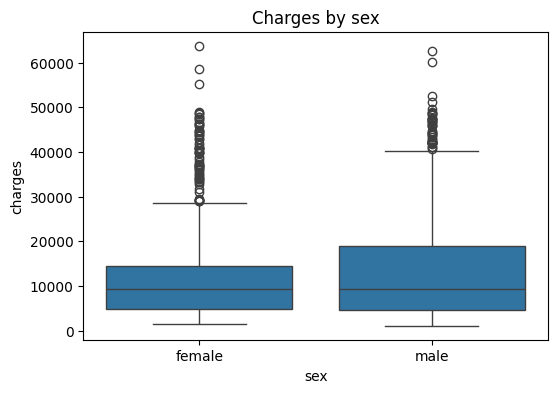

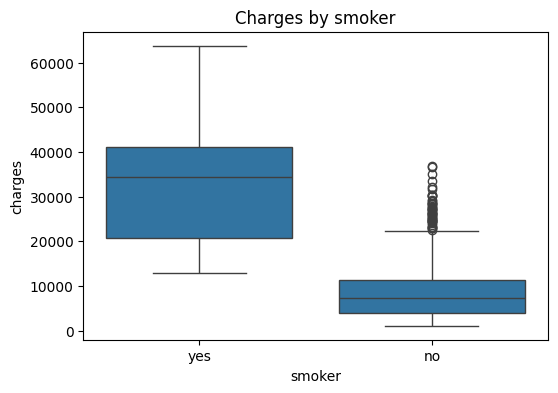

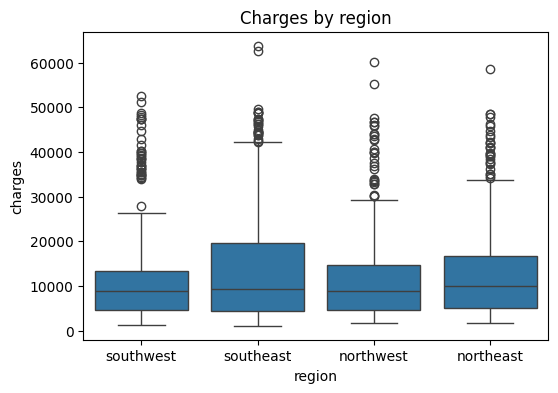

In [24]:
# Continuous variables
sns.pairplot(data=insurance_all, x_vars=['age', 'bmi', 'children'], y_vars='charges', height=4, kind='scatter')
plt.show()

# Categorical variables
categorical_vars = ['sex', 'smoker', 'region']
for var in categorical_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=var, y='charges', data=insurance_all)
    plt.title(f'Charges by {var}')
    plt.show()

Part c. Write the code that fits a linear regression model to the data, predicting charges from the other variables.

In [25]:
model_ins = smf.ols(
    "charges ~ age + sex + bmi + children + smoker + region",
    data=insurance_all
).fit()

print(model_ins.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:47:20   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.194e+04    

Part d. For each categorical variable in the original data set, report what variables have been created to represent it in the data we use in the regression model. Report what the base level is for each categorical variable.

Part e. Explain how the effect of age is interpreted in the regression model.

Part f. Explain how the effect of smoking is interpreted in the regression model.

Part g. Explain how the effect of region is interpreted in the regression model.

**Problem 5** Run the following code, which splits the outcome variable into high charges and low charges.

In [ ]:
# targets from insurance['charges'] only
import pandas as pd
insurance_all = pd.read_csv("https://richardson.byu.edu/220/insurance_all.csv")

import numpy as np
import pandas as pd

m = insurance_all['charges'].median()
insurance_all['cost_bin2'] = np.where(insurance_all['charges'] <= m, 'low', 'high')

q33, q67 = insurance_all['charges'].quantile([0.33, 0.67]).values
insurance_all['cost_bin3'] = pd.cut(
    insurance_all['charges'],
    bins=[-np.inf, q33, q67, np.inf],
    labels=['low', 'med', 'high']
)


Part a. Fit a logistic regression model with `cost_bin2` as the target variable.

Part b. Interpret the coefficient associated with `age`

Part c. Fit a classification tree for `cost_bin2` with a max depth of 3.

Part d. Print the tree.

Part e. Fit a a classification tree for the target variable with 3 bins, called `cost_bin3` with a max depth of 3 and print the resulting tree.